In [1]:
import sys; sys.path.append('../..')
from abslithist import *

In [2]:
def to_period(y):
    if y<1600: return None#'<C17'
    if y>=2000: return None
    return to_cent(y)

In [3]:
tiltplotfn='../../data/scores/tilt.scores.fig.ft'
# !rm $tiltplotfn
if not os.path.exists(tiltplotfn):
    # loading
    dfall=pd.read_feather('../../data/scores/tilt.scores.ft')
    # dfq=dfall.dropna().query('1600<=year<2000')
    dfq=dfall.dropna()
    dfq['period']=dfq.year.parallel_apply(to_period)
    dfq=dfq.dropna().reset_index()
    dfq.to_feather(tiltplotfn)
else:
    dfq=pd.read_feather(tiltplotfn)
dfq

,index,year,score,period
0,0,1958,-0.248989,C20
1,1,1958,-0.248989,C20
2,2,1958,-0.248989,C20
3,3,1958,-0.248989,C20
4,4,1958,-0.248989,C20
...,...,...,...,...
45143022,47840521,1611,-1.091945,C17
45143023,47840522,1611,1.655414,C17
45143024,47840523,1611,0.806341,C17
45143025,47840525,1611,1.193068,C17


In [11]:
dashd={
    'C17':'dotted',
    'C18':'dashed',
    'C19':'dashdot',
    'C20':'solid'
}

In [16]:
# filter
def plot_mega_density(dfq,x='mean',group='period',fig=None,n=1000,runs=1):
    import plotnine as p9
    for n in range(runs):
        print(n,'sampling...')
        figdf=dfq.groupby(group).sample(n=n,replace=True)
        
        if fig is None:
            p9.options.dpi=300
            p9.options.figure_size=(6,6)
            fig = p9.ggplot(
                p9.aes(
                    x=x,
                    group=group,
                    linetype=group
                )
            )
            fig+=p9.theme_classic()
            fig+=p9.scale_linetype_manual(dashd)
            fig+=p9.geom_vline(xintercept=0)
        
        fig+=p9.geom_density(alpha=0.25,data=figdf,size=1)
    
    return fig

#     # label peaks
#     xys=[]
#     for period in set(figdf.period):
#         vals=figdf[figdf.period==period][x].dropna()
#         xys.append((period, vals.mean(), get_density_peak(vals)))
#     maxpeak=max(y for p,x,y in xys)
#     for period,x,y in xys:
#         fig+=p9.geom_label(x=x, y=y, label=period, size=10)
#     return fig

0


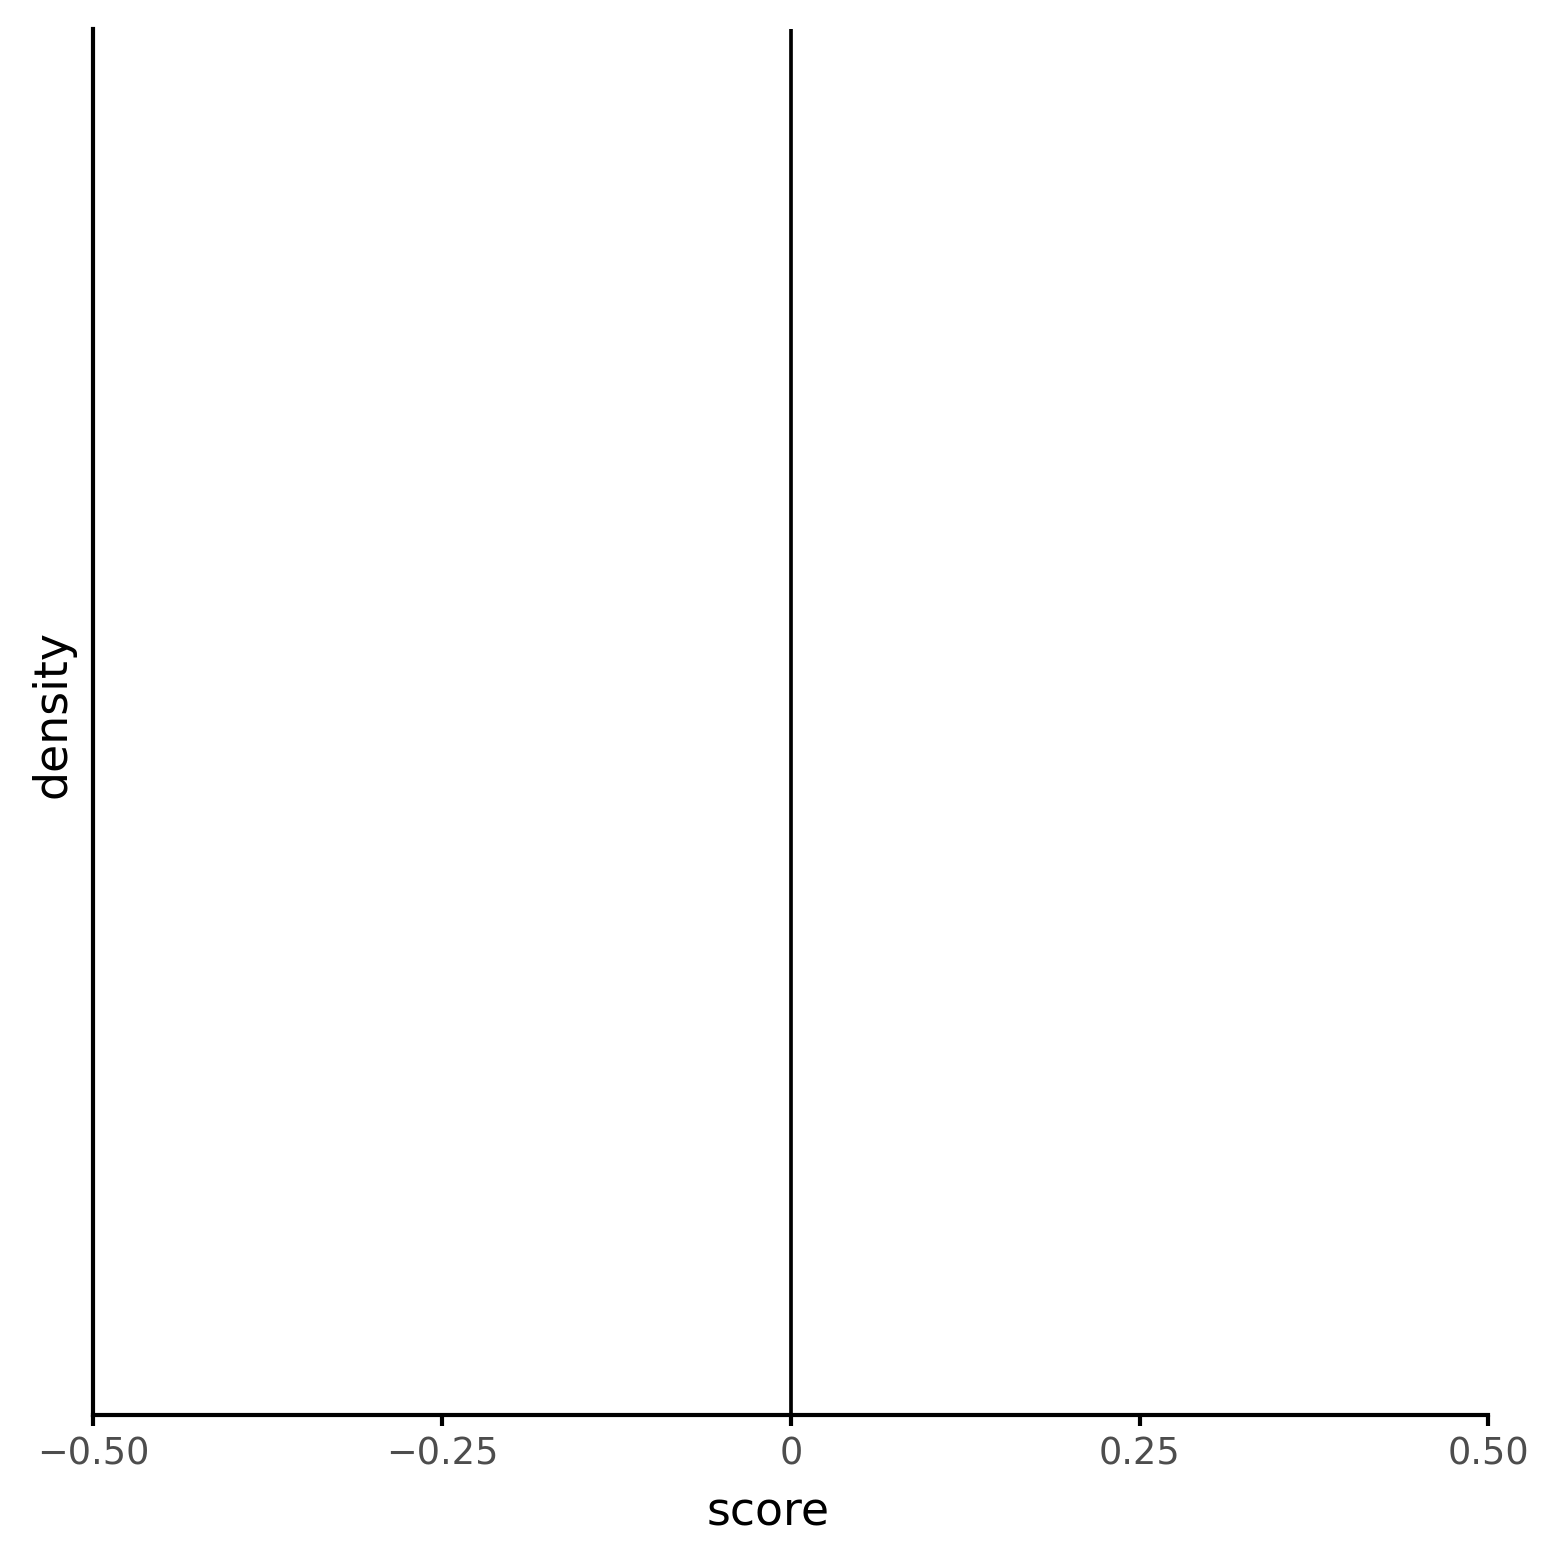

<ggplot: (8736684832249)>

In [18]:
fig=plot_mega_density(dfq, x='score', n=10000, runs=1)
fig